# DRL Course 2023 Домашнее задание 5 #

Отчет по выполнению домашнего задания, Nikita Sorokin

### Deep Q-Network


Задаем структуру аппроксимации $Q^\theta$, начальные вектор параметров $\theta$, вероятность исследования среды $\varepsilon = 1$.

Для каждого эпизода $k$ делаем:

Пока эпизод не закончен делаем:

- Находясь в состоянии $S_t$ совершаем действие $A_t \sim \pi(\cdot|S_t)$, где $\pi = \varepsilon\text{-greedy}(Q^\theta)$, получаем награду $R_t$  переходим в состояние $S_{t+1}$. Сохраняем $(S_t,A_t,R_t,S_{t+1}) \rightarrow Memory$


- Берем $\{(s_i,a_i,r_i,s'_i)\}_{i=1}^{n} \leftarrow Memory$, определяем целевые значения

$$
y_i =
\left\{
\begin{array}{ll}
r_i, &\text{ если } s'_i\text{ -терминальное},\\[0.0cm]
 r_i + \gamma \max\limits_{a'} Q^\theta(s'_i,a'), &\text{ иначе}
\end{array}
\right.
$$

функцию потерь $Loss(\theta) = \frac{1}{n}\sum\limits_{i=1}^n \big(y_i - Q^\theta(s_i,a_i)\big)^2$
и обновляем вектор параметров

$$
\theta \leftarrow \theta - \alpha \nabla_\theta Loss(\theta)
$$

- Уменьшаем $\varepsilon$


## Задание 1

Обучить Агента решать Acrobot-v1, MountainCar-v0, или LunarLander-v2 (одну на выбор) методом DQN. Найти оптимальные гиперпараметры. Сравнить с алгоритмом Deep Cross-Entropy на графиках.

### Acrobot-v1

Подберем наилучшую архитектуру:

Двухслойные линейные нейросети с активацией ReLU:

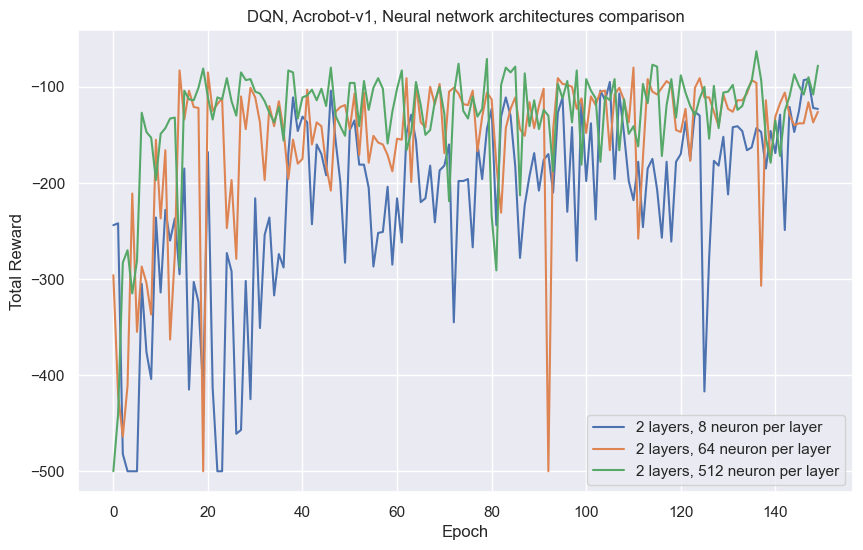

In [1]:
from IPython.display import display, Image
display(Image(filename="dqn_acrobot_nn2.png"))

Валидация:

*DQN, 2 layers, 8 neurons per layer validation_score: -298.18*   
*DQN, 2 layers, 64 neurons per layer validation_score: -475.77*   
**DQN, 2 layers, 512 neurons per layer validation_score: -106.94**

Трехслойные линейные нейросети с активацией ReLU:

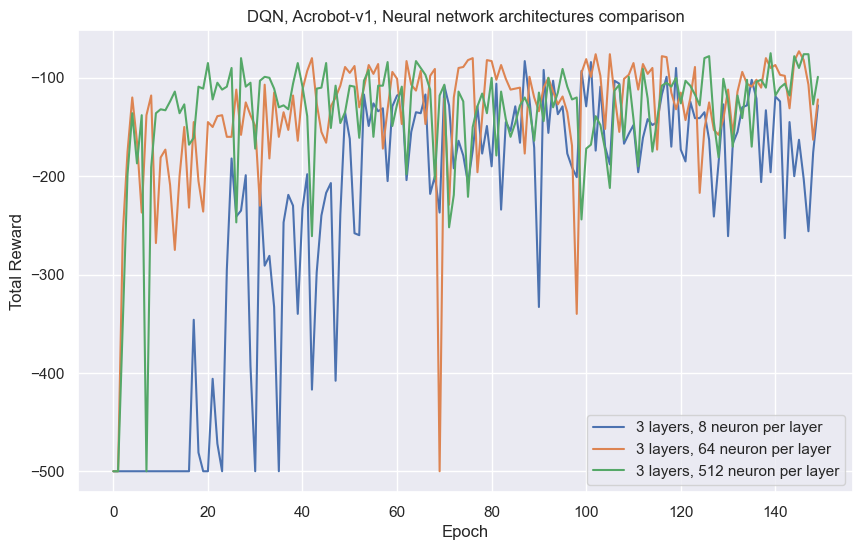

In [2]:
display(Image(filename="dqn_acrobot_nn3.png"))

Валидация:

*DQN, 3 layers, 8 neurons per layer validation_score: -497.92*   
*DQN, 3 layers, 64 neurons per layer validation_score: -132.53*    
*DQN, 3 layers, 512 neurons per layer validation_score: -157.49*   

Наилучшим агентом оказался:

**DQN, 2 layers, 512 neurons per layer validation_score: -106.94**

Дообучим:

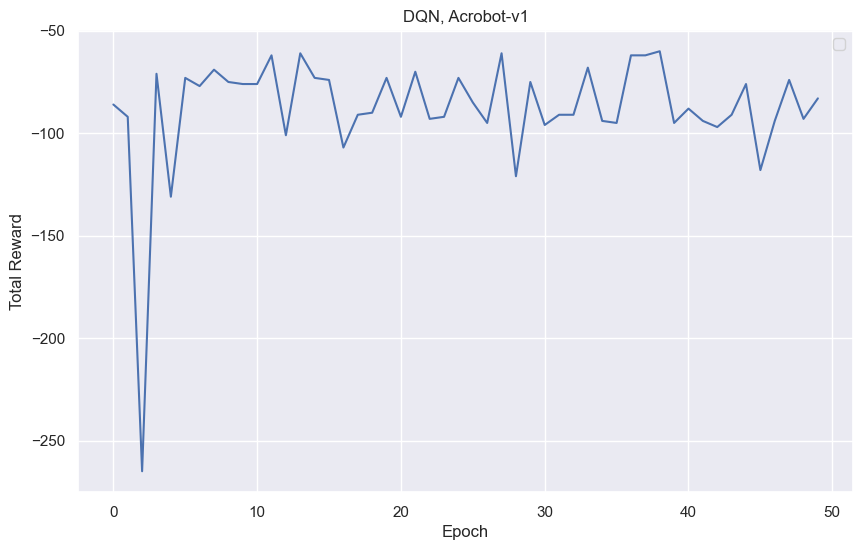

In [3]:
display(Image(filename="dqn_acrobot_best_model.png"))

Валидация: 

**DQN validation_score: -82.06**
    
   
    
    
    
    

График обучения той же среды но методом Кросс-Энтропии:

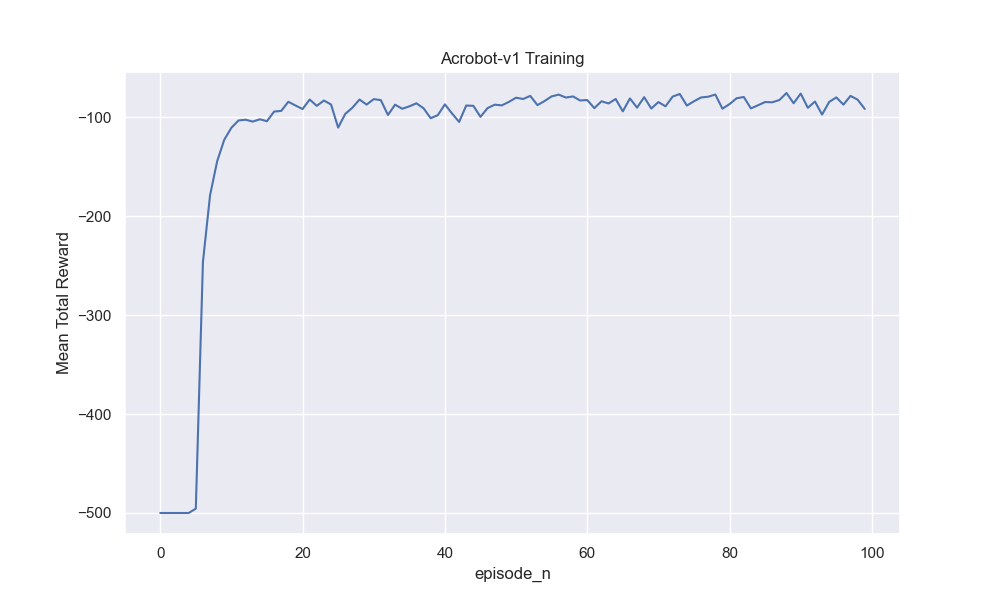

In [10]:
display(Image(filename="cem_acrobot_training.png"))

Можно сказать, что без использования техник регуляризации DQN при подобранных гиперпараметрах ведет себя более неустойчиво. Метод Кросс-Энтропии в свою очередь после прохождения порога в -100 почти не опускается ниже. Однако стоит помнить, что график метода Кросс-Энтропии показывает усредненную полную награду.

## Задание 2

Реализовать с сравнить (на выбранной ранее среде) друг с другом и с обычным DQN следующие его модификации:

* DQN с Hard Target Update;
* DQN с Soft Target Update;
* Double DQN.

Будем сравнивать алгоритмы на среде Acrobot-v1

### Hard Target Network

Идея алгоритма:

* Устанавливаем $ \theta = \theta' $
* В цикле:
    * $ y = r + \gamma \max_{a'} Q^{\theta'}(s', a') $ 
    * $ Loss(\theta) = (y - Q^\theta (s, a))^2 $ 
    * $ \theta \leftarrow \theta - \alpha \nabla_\theta Loss(\theta) $
* $ \theta' = \theta $

Полученный результат для подобранной ранее архитектуры и hard_n = 3 (количество итераций в цикле самого метода):

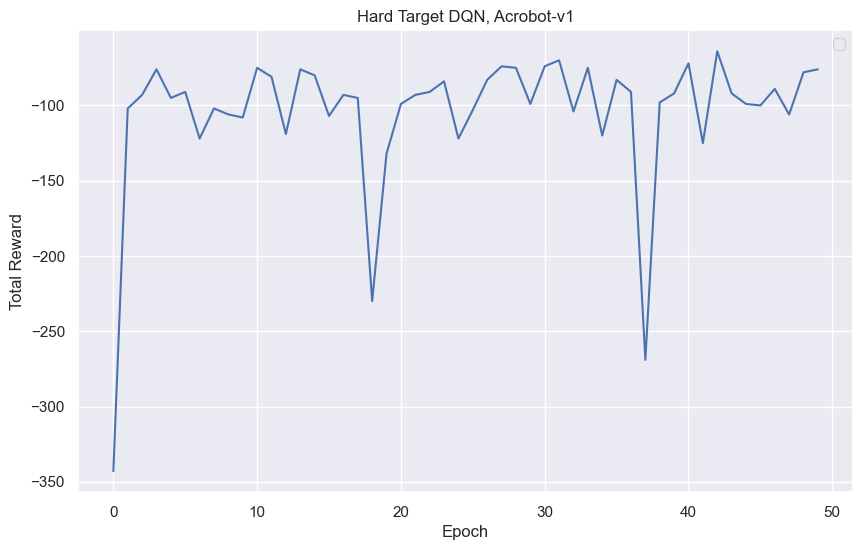

In [5]:
display(Image(filename="hard_dqn_acrobot.png"))

Валидация: 

**Hard Target DQN validation_score: -94.85**
    
   
    
    
    
    

### Soft Target Network

Идея алгоритма:

* $ y = r + \gamma \max_{a'} Q^{\theta'}(s', a') $ 
* $ Loss(\theta) = (y - Q^\theta (s, a))^2 $ 
* $ \theta \leftarrow \theta - \alpha \nabla_\theta Loss(\theta) $
* $ \theta' = \tau \theta + (1 - \tau) \theta' $

Полученный результат для подобранной ранее архитектуры и $ \tau $ = 0.9. При таком подобранном параметре $ \tau $ эффект регуляризации не сильно большой, однако сходимость остается такой же быстрой как и в стандартном DQN. 

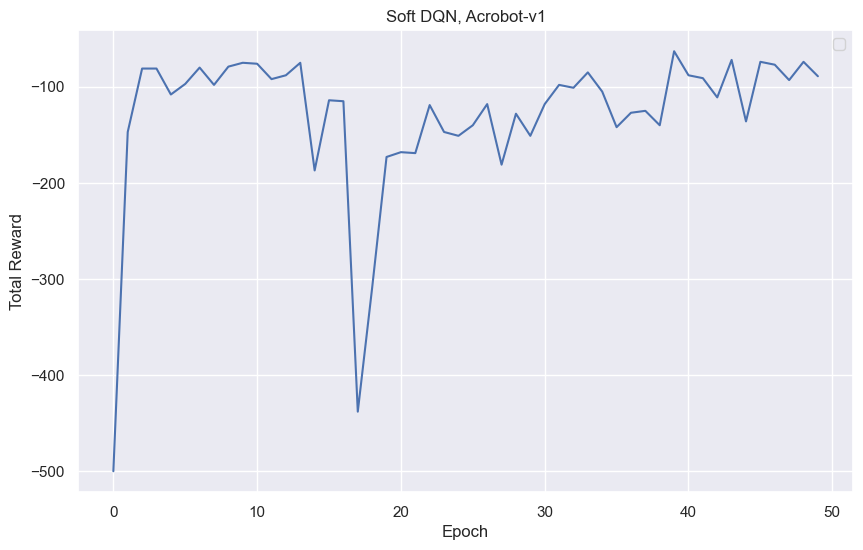

In [7]:
display(Image(filename="soft_dqn_acrobot.png"))

Валидация: 

**Soft Target DQN validation_score: -105.78**
    
   
    
    
    
    

### Double DQN

Идея алгоритма:

* $ y = r + \gamma Q^{\theta}(s', \argmax_{a'} Q^{\theta'} (s', a')) $ 
* $ Loss(\theta) = (y - Q^\theta (s, a))^2 $ 
* $ \theta \leftarrow \theta - \alpha \nabla_\theta Loss(\theta) $
* $ \theta' = \tau \theta + (1 - \tau) \theta' $

Полученный результат для гиперпараметров из Soft Target DQN:

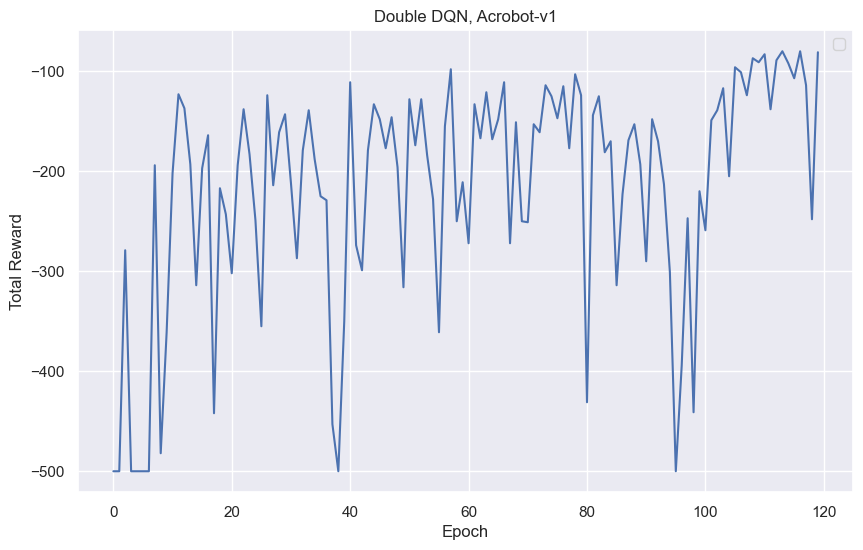

In [8]:
display(Image(filename="double_dqn_acrobot.png"))

Валидация: 

**Double DQN validation_score: -99.47**
    
   
    
    
    
    